# Continuing Expressions

In [1]:
import polars as pl
pl.__version__

'1.20.0'

In [2]:
import math
import numpy as np

print(f"{math.pi=}")
rng = np.random.default_rng(1729)
print(f"{rng.random()=}")

math.pi=3.141592653589793
rng.random()=0.03074202960516803


## Types of Operations

### Example A: Element-Wise Operations

In [3]:
penguins = pl.read_csv("data/penguins.csv", null_values="NA").select(
    "species",
    "island",
    "sex",
    "year",
    mass=pl.col("body_mass_g") / 1000,
)
penguins.with_columns(
    mass_sqrt=pl.col("mass").sqrt(),
    mass_exp=pl.col("mass").exp(),
)

shape: (344, 7)
┌───────────┬───────────┬────────┬──────┬───────┬───────────┬───────────┐
│ species   ┆ island    ┆ sex    ┆ year ┆ mass  ┆ mass_sqrt ┆ mass_exp  │
│ ---       ┆ ---       ┆ ---    ┆ ---  ┆ ---   ┆ ---       ┆ ---       │
│ str       ┆ str       ┆ str    ┆ i64  ┆ f64   ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪════════╪══════╪═══════╪═══════════╪═══════════╡
│ Adelie    ┆ Torgersen ┆ male   ┆ 2007 ┆ 3.75  ┆ 1.936492  ┆ 42.521082 │
│ Adelie    ┆ Torgersen ┆ female ┆ 2007 ┆ 3.8   ┆ 1.949359  ┆ 44.701184 │
│ Adelie    ┆ Torgersen ┆ female ┆ 2007 ┆ 3.25  ┆ 1.802776  ┆ 25.79034  │
│ Adelie    ┆ Torgersen ┆ null   ┆ 2007 ┆ null  ┆ null      ┆ null      │
│ Adelie    ┆ Torgersen ┆ female ┆ 2007 ┆ 3.45  ┆ 1.857418  ┆ 31.500392 │
│ …         ┆ …         ┆ …      ┆ …    ┆ …     ┆ …         ┆ …         │
│ Chinstrap ┆ Dream     ┆ male   ┆ 2009 ┆ 4.0   ┆ 2.0       ┆ 54.59815  │
│ Chinstrap ┆ Dream     ┆ female ┆ 2009 ┆ 3.4   ┆ 1.843909  ┆ 29.9641   │
│ Chinstrap ┆ Dream     ┆ male   ┆ 2009 ┆ 3.775 ┆ 1.942936  ┆ 43.597508 │
│ Chinstrap ┆ Dream     ┆ male   ┆ 2009 ┆ 4.1   ┆ 2.024846  ┆ 60.340288 │
│ Chinstrap ┆ Dream     ┆ female ┆ 2009 ┆ 3.775 ┆ 1.942936  ┆ 43.597508 │
└───────────┴───────────┴────────┴──────┴───────┴───────────┴───────────┘

### Example B: Operations That Summarize to One

In [4]:
penguins.select(pl.col("mass").mean(), pl.col("island").first())

shape: (1, 2)
┌──────────┬───────────┐
│ mass     ┆ island    │
│ ---      ┆ ---       │
│ f64      ┆ str       │
╞══════════╪═══════════╡
│ 4.201754 ┆ Torgersen │
└──────────┴───────────┘

### Example C: Operations That Summarize to One or More

In [6]:
penguins.select(pl.col("island").unique())

shape: (3, 1)
┌───────────┐
│ island    │
│ ---       │
│ str       │
╞═══════════╡
│ Dream     │
│ Torgersen │
│ Biscoe    │
└───────────┘

### Example D: Operations That Extend

In [5]:
penguins.select(
    pl.col("species")
    .unique()
    .repeat_by(3000)
    .explode()
    .extend_constant("Saiyan", n=1)
)

shape: (9_001, 1)
┌───────────┐
│ species   │
│ ---       │
│ str       │
╞═══════════╡
│ Adelie    │
│ Adelie    │
│ Adelie    │
│ Adelie    │
│ Adelie    │
│ …         │
│ Chinstrap │
│ Chinstrap │
│ Chinstrap │
│ Chinstrap │
│ Saiyan    │
└───────────┘

## Element-Wise Operations

### Operations That Perform Mathematical Transformations

In [7]:
(
    pl.DataFrame({"x": [-2.0, 0.0, 0.5, 1.0, math.e, 1000.0]}).with_columns(
        abs=pl.col("x").abs(),
        exp=pl.col("x").exp(),
        log2=pl.col("x").log(2),
        log10=pl.col("x").log10(),
        log1p=pl.col("x").log1p(),
        sign=pl.col("x").sign(),
        sqrt=pl.col("x").sqrt(),
    )
)

shape: (6, 8)
┌──────────┬──────────┬───────────┬──────────┬──────────┬──────────┬──────┬───────────┐
│ x        ┆ abs      ┆ exp       ┆ log2     ┆ log10    ┆ log1p    ┆ sign ┆ sqrt      │
│ ---      ┆ ---      ┆ ---       ┆ ---      ┆ ---      ┆ ---      ┆ ---  ┆ ---       │
│ f64      ┆ f64      ┆ f64       ┆ f64      ┆ f64      ┆ f64      ┆ f64  ┆ f64       │
╞══════════╪══════════╪═══════════╪══════════╪══════════╪══════════╪══════╪═══════════╡
│ -2.0     ┆ 2.0      ┆ 0.135335  ┆ NaN      ┆ NaN      ┆ NaN      ┆ -1.0 ┆ NaN       │
│ 0.0      ┆ 0.0      ┆ 1.0       ┆ -inf     ┆ -inf     ┆ 0.0      ┆ 0.0  ┆ 0.0       │
│ 0.5      ┆ 0.5      ┆ 1.648721  ┆ -1.0     ┆ -0.30103 ┆ 0.405465 ┆ 1.0  ┆ 0.707107  │
│ 1.0      ┆ 1.0      ┆ 2.718282  ┆ 0.0      ┆ 0.0      ┆ 0.693147 ┆ 1.0  ┆ 1.0       │
│ 2.718282 ┆ 2.718282 ┆ 15.154262 ┆ 1.442695 ┆ 0.434294 ┆ 1.313262 ┆ 1.0  ┆ 1.648721  │
│ 1000.0   ┆ 1000.0   ┆ inf       ┆ 9.965784 ┆ 3.0      ┆ 6.908755 ┆ 1.0  ┆ 31.622777 │
└──────────┴──────────┴───────────┴──────────┴──────────┴──────────┴──────┴───────────┘

### Operations Related to Trigonometry

In [8]:
(
    pl.DataFrame(
        {"x": [-math.pi, 0.0, 1.0, math.pi, 2 * math.pi, 90.0, 180.0, 360.0]}
    ).with_columns(
        arccos=pl.col("x").arccos(),
        cos=pl.col("x").cos(),
        degrees=pl.col("x").degrees(),
        radians=pl.col("x").radians(),
        sin=pl.col("x").sin(),
    )
)

shape: (8, 6)
┌───────────┬──────────┬───────────┬──────────────┬───────────┬─────────────┐
│ x         ┆ arccos   ┆ cos       ┆ degrees      ┆ radians   ┆ sin         │
│ ---       ┆ ---      ┆ ---       ┆ ---          ┆ ---       ┆ ---         │
│ f64       ┆ f64      ┆ f64       ┆ f64          ┆ f64       ┆ f64         │
╞═══════════╪══════════╪═══════════╪══════════════╪═══════════╪═════════════╡
│ -3.141593 ┆ NaN      ┆ -1.0      ┆ -180.0       ┆ -0.054831 ┆ -1.2246e-16 │
│ 0.0       ┆ 1.570796 ┆ 1.0       ┆ 0.0          ┆ 0.0       ┆ 0.0         │
│ 1.0       ┆ 0.0      ┆ 0.540302  ┆ 57.29578     ┆ 0.017453  ┆ 0.841471    │
│ 3.141593  ┆ NaN      ┆ -1.0      ┆ 180.0        ┆ 0.054831  ┆ 1.2246e-16  │
│ 6.283185  ┆ NaN      ┆ 1.0       ┆ 360.0        ┆ 0.109662  ┆ -2.4493e-16 │
│ 90.0      ┆ NaN      ┆ -0.448074 ┆ 5156.620156  ┆ 1.570796  ┆ 0.893997    │
│ 180.0     ┆ NaN      ┆ -0.59846  ┆ 10313.240312 ┆ 3.141593  ┆ -0.801153   │
│ 360.0     ┆ NaN      ┆ -0.283691 ┆ 20626.480625 ┆ 6.283185  ┆ 0.958916    │
└───────────┴──────────┴───────────┴──────────────┴───────────┴─────────────┘

### Operations That Round and Categorize

In [9]:
(
    pl.DataFrame(
        {"x": [-6.0, -0.5, 0.0, 0.5, math.pi, 9.9, 9.99, 9.999]}
    ).with_columns(
        ceil=pl.col("x").ceil(),
        clip=pl.col("x").clip(-1, 1),
        cut=pl.col("x").cut([-1, 1], labels=["bad", "neutral", "good"]),
        floor=pl.col("x").floor(),
        qcut=pl.col("x").qcut([0.5], labels=["below median", "above median"]),
        round2=pl.col("x").round(2),
        round0=pl.col("x").round(0),
    )
)

shape: (8, 8)
┌──────────┬──────┬──────┬─────────┬───────┬──────────────┬────────┬────────┐
│ x        ┆ ceil ┆ clip ┆ cut     ┆ floor ┆ qcut         ┆ round2 ┆ round0 │
│ ---      ┆ ---  ┆ ---  ┆ ---     ┆ ---   ┆ ---          ┆ ---    ┆ ---    │
│ f64      ┆ f64  ┆ f64  ┆ cat     ┆ f64   ┆ cat          ┆ f64    ┆ f64    │
╞══════════╪══════╪══════╪═════════╪═══════╪══════════════╪════════╪════════╡
│ -6.0     ┆ -6.0 ┆ -1.0 ┆ bad     ┆ -6.0  ┆ below median ┆ -6.0   ┆ -6.0   │
│ -0.5     ┆ -0.0 ┆ -0.5 ┆ neutral ┆ -1.0  ┆ below median ┆ -0.5   ┆ -1.0   │
│ 0.0      ┆ 0.0  ┆ 0.0  ┆ neutral ┆ 0.0   ┆ below median ┆ 0.0    ┆ 0.0    │
│ 0.5      ┆ 1.0  ┆ 0.5  ┆ neutral ┆ 0.0   ┆ below median ┆ 0.5    ┆ 1.0    │
│ 3.141593 ┆ 4.0  ┆ 1.0  ┆ good    ┆ 3.0   ┆ above median ┆ 3.14   ┆ 3.0    │
│ 9.9      ┆ 10.0 ┆ 1.0  ┆ good    ┆ 9.0   ┆ above median ┆ 9.9    ┆ 10.0   │
│ 9.99     ┆ 10.0 ┆ 1.0  ┆ good    ┆ 9.0   ┆ above median ┆ 9.99   ┆ 10.0   │
│ 9.999    ┆ 10.0 ┆ 1.0  ┆ good    ┆ 9.0   ┆ above median ┆ 10.0   ┆ 10.0   │
└──────────┴──────┴──────┴─────────┴───────┴──────────────┴────────┴────────┘

### Operations for Missing or Infinite Values

In [10]:
x = [42.0, math.nan, None, math.inf, -math.inf]
(
    pl.DataFrame({"x": x}).with_columns(
        fill_nan=pl.col("x").fill_nan(999),
        fill_null=pl.col("x").fill_null(0),
        is_finite=pl.col("x").is_finite(),
        is_infinite=pl.col("x").is_infinite(),
        is_nan=pl.col("x").is_nan(),
        is_null=pl.col("x").is_null(),
    )
)

shape: (5, 7)
┌──────┬──────────┬───────────┬───────────┬─────────────┬────────┬─────────┐
│ x    ┆ fill_nan ┆ fill_null ┆ is_finite ┆ is_infinite ┆ is_nan ┆ is_null │
│ ---  ┆ ---      ┆ ---       ┆ ---       ┆ ---         ┆ ---    ┆ ---     │
│ f64  ┆ f64      ┆ f64       ┆ bool      ┆ bool        ┆ bool   ┆ bool    │
╞══════╪══════════╪═══════════╪═══════════╪═════════════╪════════╪═════════╡
│ 42.0 ┆ 42.0     ┆ 42.0      ┆ true      ┆ false       ┆ false  ┆ false   │
│ NaN  ┆ 999.0    ┆ NaN       ┆ false     ┆ false       ┆ true   ┆ false   │
│ null ┆ null     ┆ 0.0       ┆ null      ┆ null        ┆ null   ┆ true    │
│ inf  ┆ inf      ┆ inf       ┆ false     ┆ true        ┆ false  ┆ false   │
│ -inf ┆ -inf     ┆ -inf      ┆ false     ┆ true        ┆ false  ┆ false   │
└──────┴──────────┴───────────┴───────────┴─────────────┴────────┴─────────┘

In [11]:
(
    pl.DataFrame({"x": x}).with_columns(
        fill_both=pl.col("x").fill_nan(0).fill_null(0),
        is_either=(pl.col("x").is_nan() | pl.col("x").is_null()),
    )
)

shape: (5, 3)
┌──────┬───────────┬───────────┐
│ x    ┆ fill_both ┆ is_either │
│ ---  ┆ ---       ┆ ---       │
│ f64  ┆ f64       ┆ bool      │
╞══════╪═══════════╪═══════════╡
│ 42.0 ┆ 42.0      ┆ false     │
│ NaN  ┆ 0.0       ┆ true      │
│ null ┆ 0.0       ┆ true      │
│ inf  ┆ inf       ┆ false     │
│ -inf ┆ -inf      ┆ false     │
└──────┴───────────┴───────────┘

### Other Operations

In [12]:
(
    pl.DataFrame({"x": ["here", "there", "their", "they're"]}).with_columns(
        hash=pl.col("x").hash(seed=1337),
        repeat_by=pl.col("x").repeat_by(3),
        replace=pl.col("x").replace(
            {
                "here": "there",
                "they're": "they are",
            }
        ),
    )
)

shape: (4, 4)
┌─────────┬──────────────────────┬─────────────────────────────────┬──────────┐
│ x       ┆ hash                 ┆ repeat_by                       ┆ replace  │
│ ---     ┆ ---                  ┆ ---                             ┆ ---      │
│ str     ┆ u64                  ┆ list[str]                       ┆ str      │
╞═════════╪══════════════════════╪═════════════════════════════════╪══════════╡
│ here    ┆ 12695211751326448172 ┆ ["here", "here", "here"]        ┆ there    │
│ there   ┆ 17329794691236705436 ┆ ["there", "there", "there"]     ┆ there    │
│ their   ┆ 2663095961041830581  ┆ ["their", "their", "their"]     ┆ their    │
│ they're ┆ 6743063676290245144  ┆ ["they're", "they're", "they'r… ┆ they are │
└─────────┴──────────────────────┴─────────────────────────────────┴──────────┘

## Nonreducing Series-Wise Operations

### Operations That Accumulate

In [13]:
(
    pl.DataFrame(
        {"x": [0.0, 1.0, 2.0, None, 2.0, np.nan, -1.0, 2.0]}
    ).with_columns(
        cum_count=pl.col("x").cum_count(),
        cum_max=pl.col("x").cum_max(),
        cum_min=pl.col("x").cum_min(),
        cum_prod=pl.col("x").cum_prod(reverse=True),
        cum_sum=pl.col("x").cum_sum(),
        diff=pl.col("x").diff(),
        pct_change=pl.col("x").pct_change(),
    )
)

shape: (8, 8)
┌──────┬───────────┬─────────┬─────────┬──────────┬─────────┬──────┬────────────┐
│ x    ┆ cum_count ┆ cum_max ┆ cum_min ┆ cum_prod ┆ cum_sum ┆ diff ┆ pct_change │
│ ---  ┆ ---       ┆ ---     ┆ ---     ┆ ---      ┆ ---     ┆ ---  ┆ ---        │
│ f64  ┆ u32       ┆ f64     ┆ f64     ┆ f64      ┆ f64     ┆ f64  ┆ f64        │
╞══════╪═══════════╪═════════╪═════════╪══════════╪═════════╪══════╪════════════╡
│ 0.0  ┆ 1         ┆ 0.0     ┆ 0.0     ┆ NaN      ┆ 0.0     ┆ null ┆ null       │
│ 1.0  ┆ 2         ┆ 1.0     ┆ 0.0     ┆ NaN      ┆ 1.0     ┆ 1.0  ┆ inf        │
│ 2.0  ┆ 3         ┆ 2.0     ┆ 0.0     ┆ NaN      ┆ 3.0     ┆ 1.0  ┆ 1.0        │
│ null ┆ 3         ┆ null    ┆ null    ┆ null     ┆ null    ┆ null ┆ 0.0        │
│ 2.0  ┆ 4         ┆ 2.0     ┆ 0.0     ┆ NaN      ┆ 5.0     ┆ null ┆ 0.0        │
│ NaN  ┆ 5         ┆ 2.0     ┆ 0.0     ┆ NaN      ┆ NaN     ┆ NaN  ┆ NaN        │
│ -1.0 ┆ 6         ┆ 2.0     ┆ -1.0    ┆ -2.0     ┆ NaN     ┆ NaN  ┆ NaN        │
│ 2.0  ┆ 7         ┆ 2.0     ┆ -1.0    ┆ 2.0      ┆ NaN     ┆ 3.0  ┆ -3.0       │
└──────┴───────────┴─────────┴─────────┴──────────┴─────────┴──────┴────────────┘

### Operations That Fill and Shift

In [14]:
(
    pl.DataFrame(
        {"x": [-1.0, 0.0, 1.0, None, None, 3.0, 4.0, math.nan, 6.0]}
    ).with_columns(
        backward_fill=pl.col("x").backward_fill(),
        forward_fill=pl.col("x").forward_fill(limit=1),
        interp1=pl.col("x").interpolate(method="linear"),
        interp2=pl.col("x").interpolate(method="nearest"),
        shift1=pl.col("x").shift(1),
        shift2=pl.col("x").shift(-2),
    )
)

shape: (9, 7)
┌──────┬───────────────┬──────────────┬──────────┬─────────┬────────┬────────┐
│ x    ┆ backward_fill ┆ forward_fill ┆ interp1  ┆ interp2 ┆ shift1 ┆ shift2 │
│ ---  ┆ ---           ┆ ---          ┆ ---      ┆ ---     ┆ ---    ┆ ---    │
│ f64  ┆ f64           ┆ f64          ┆ f64      ┆ f64     ┆ f64    ┆ f64    │
╞══════╪═══════════════╪══════════════╪══════════╪═════════╪════════╪════════╡
│ -1.0 ┆ -1.0          ┆ -1.0         ┆ -1.0     ┆ -1.0    ┆ null   ┆ 1.0    │
│ 0.0  ┆ 0.0           ┆ 0.0          ┆ 0.0      ┆ 0.0     ┆ -1.0   ┆ null   │
│ 1.0  ┆ 1.0           ┆ 1.0          ┆ 1.0      ┆ 1.0     ┆ 0.0    ┆ null   │
│ null ┆ 3.0           ┆ 1.0          ┆ 1.666667 ┆ 1.0     ┆ 1.0    ┆ 3.0    │
│ null ┆ 3.0           ┆ null         ┆ 2.333333 ┆ 3.0     ┆ null   ┆ 4.0    │
│ 3.0  ┆ 3.0           ┆ 3.0          ┆ 3.0      ┆ 3.0     ┆ null   ┆ NaN    │
│ 4.0  ┆ 4.0           ┆ 4.0          ┆ 4.0      ┆ 4.0     ┆ 3.0    ┆ 6.0    │
│ NaN  ┆ NaN           ┆ NaN          ┆ NaN      ┆ NaN     ┆ 4.0    ┆ null   │
│ 6.0  ┆ 6.0           ┆ 6.0          ┆ 6.0      ┆ 6.0     ┆ NaN    ┆ null   │
└──────┴───────────────┴──────────────┴──────────┴─────────┴────────┴────────┘

### Operations Related to Duplicate Values

In [15]:
(
    pl.DataFrame({"x": ["A", "C", "D", "C"]}).with_columns(
        is_duplicated=pl.col("x").is_duplicated(),
        is_first_distinct=pl.col("x").is_first_distinct(),
        is_last_distinct=pl.col("x").is_last_distinct(),
        is_unique=pl.col("x").is_unique(),
    )
)

shape: (4, 5)
┌─────┬───────────────┬───────────────────┬──────────────────┬───────────┐
│ x   ┆ is_duplicated ┆ is_first_distinct ┆ is_last_distinct ┆ is_unique │
│ --- ┆ ---           ┆ ---               ┆ ---              ┆ ---       │
│ str ┆ bool          ┆ bool              ┆ bool             ┆ bool      │
╞═════╪═══════════════╪═══════════════════╪══════════════════╪═══════════╡
│ A   ┆ false         ┆ true              ┆ true             ┆ true      │
│ C   ┆ true          ┆ true              ┆ false            ┆ false     │
│ D   ┆ false         ┆ true              ┆ true             ┆ true      │
│ C   ┆ true          ┆ false             ┆ true             ┆ false     │
└─────┴───────────────┴───────────────────┴──────────────────┴───────────┘

### Operations That Compute Rolling Statistics

In [16]:
stock = (
    pl.read_csv("data/stock/nvda/2023.csv", try_parse_dates=True)
    .select("date", "close")
    .with_columns(
        ewm_mean=pl.col("close").ewm_mean(com=7, ignore_nulls=True),
        rolling_mean=pl.col("close").rolling_mean(window_size=7),
        rolling_min=pl.col("close").rolling_min(window_size=7),
    )
)

stock

shape: (124, 5)
┌────────────┬────────────┬────────────┬──────────────┬─────────────┐
│ date       ┆ close      ┆ ewm_mean   ┆ rolling_mean ┆ rolling_min │
│ ---        ┆ ---        ┆ ---        ┆ ---          ┆ ---         │
│ date       ┆ f64        ┆ f64        ┆ f64          ┆ f64         │
╞════════════╪════════════╪════════════╪══════════════╪═════════════╡
│ 2023-01-03 ┆ 143.149994 ┆ 143.149994 ┆ null         ┆ null        │
│ 2023-01-04 ┆ 147.490005 ┆ 145.464667 ┆ null         ┆ null        │
│ 2023-01-05 ┆ 142.649994 ┆ 144.398755 ┆ null         ┆ null        │
│ 2023-01-06 ┆ 148.589996 ┆ 145.664782 ┆ null         ┆ null        │
│ 2023-01-09 ┆ 156.279999 ┆ 148.388917 ┆ null         ┆ null        │
│ …          ┆ …          ┆ …          ┆ …            ┆ …           │
│ 2023-06-26 ┆ 406.320007 ┆ 407.54911  ┆ 425.805716   ┆ 406.320007  │
│ 2023-06-27 ┆ 418.76001  ┆ 408.950473 ┆ 424.695718   ┆ 406.320007  │
│ 2023-06-28 ┆ 411.170013 ┆ 409.227915 ┆ 422.445718   ┆ 406.320007  │
│ 2023-06-29 ┆ 408.220001 ┆ 409.101926 ┆ 418.180006   ┆ 406.320007  │
│ 2023-06-30 ┆ 423.019989 ┆ 410.841684 ┆ 417.118574   ┆ 406.320007  │
└────────────┴────────────┴────────────┴──────────────┴─────────────┘

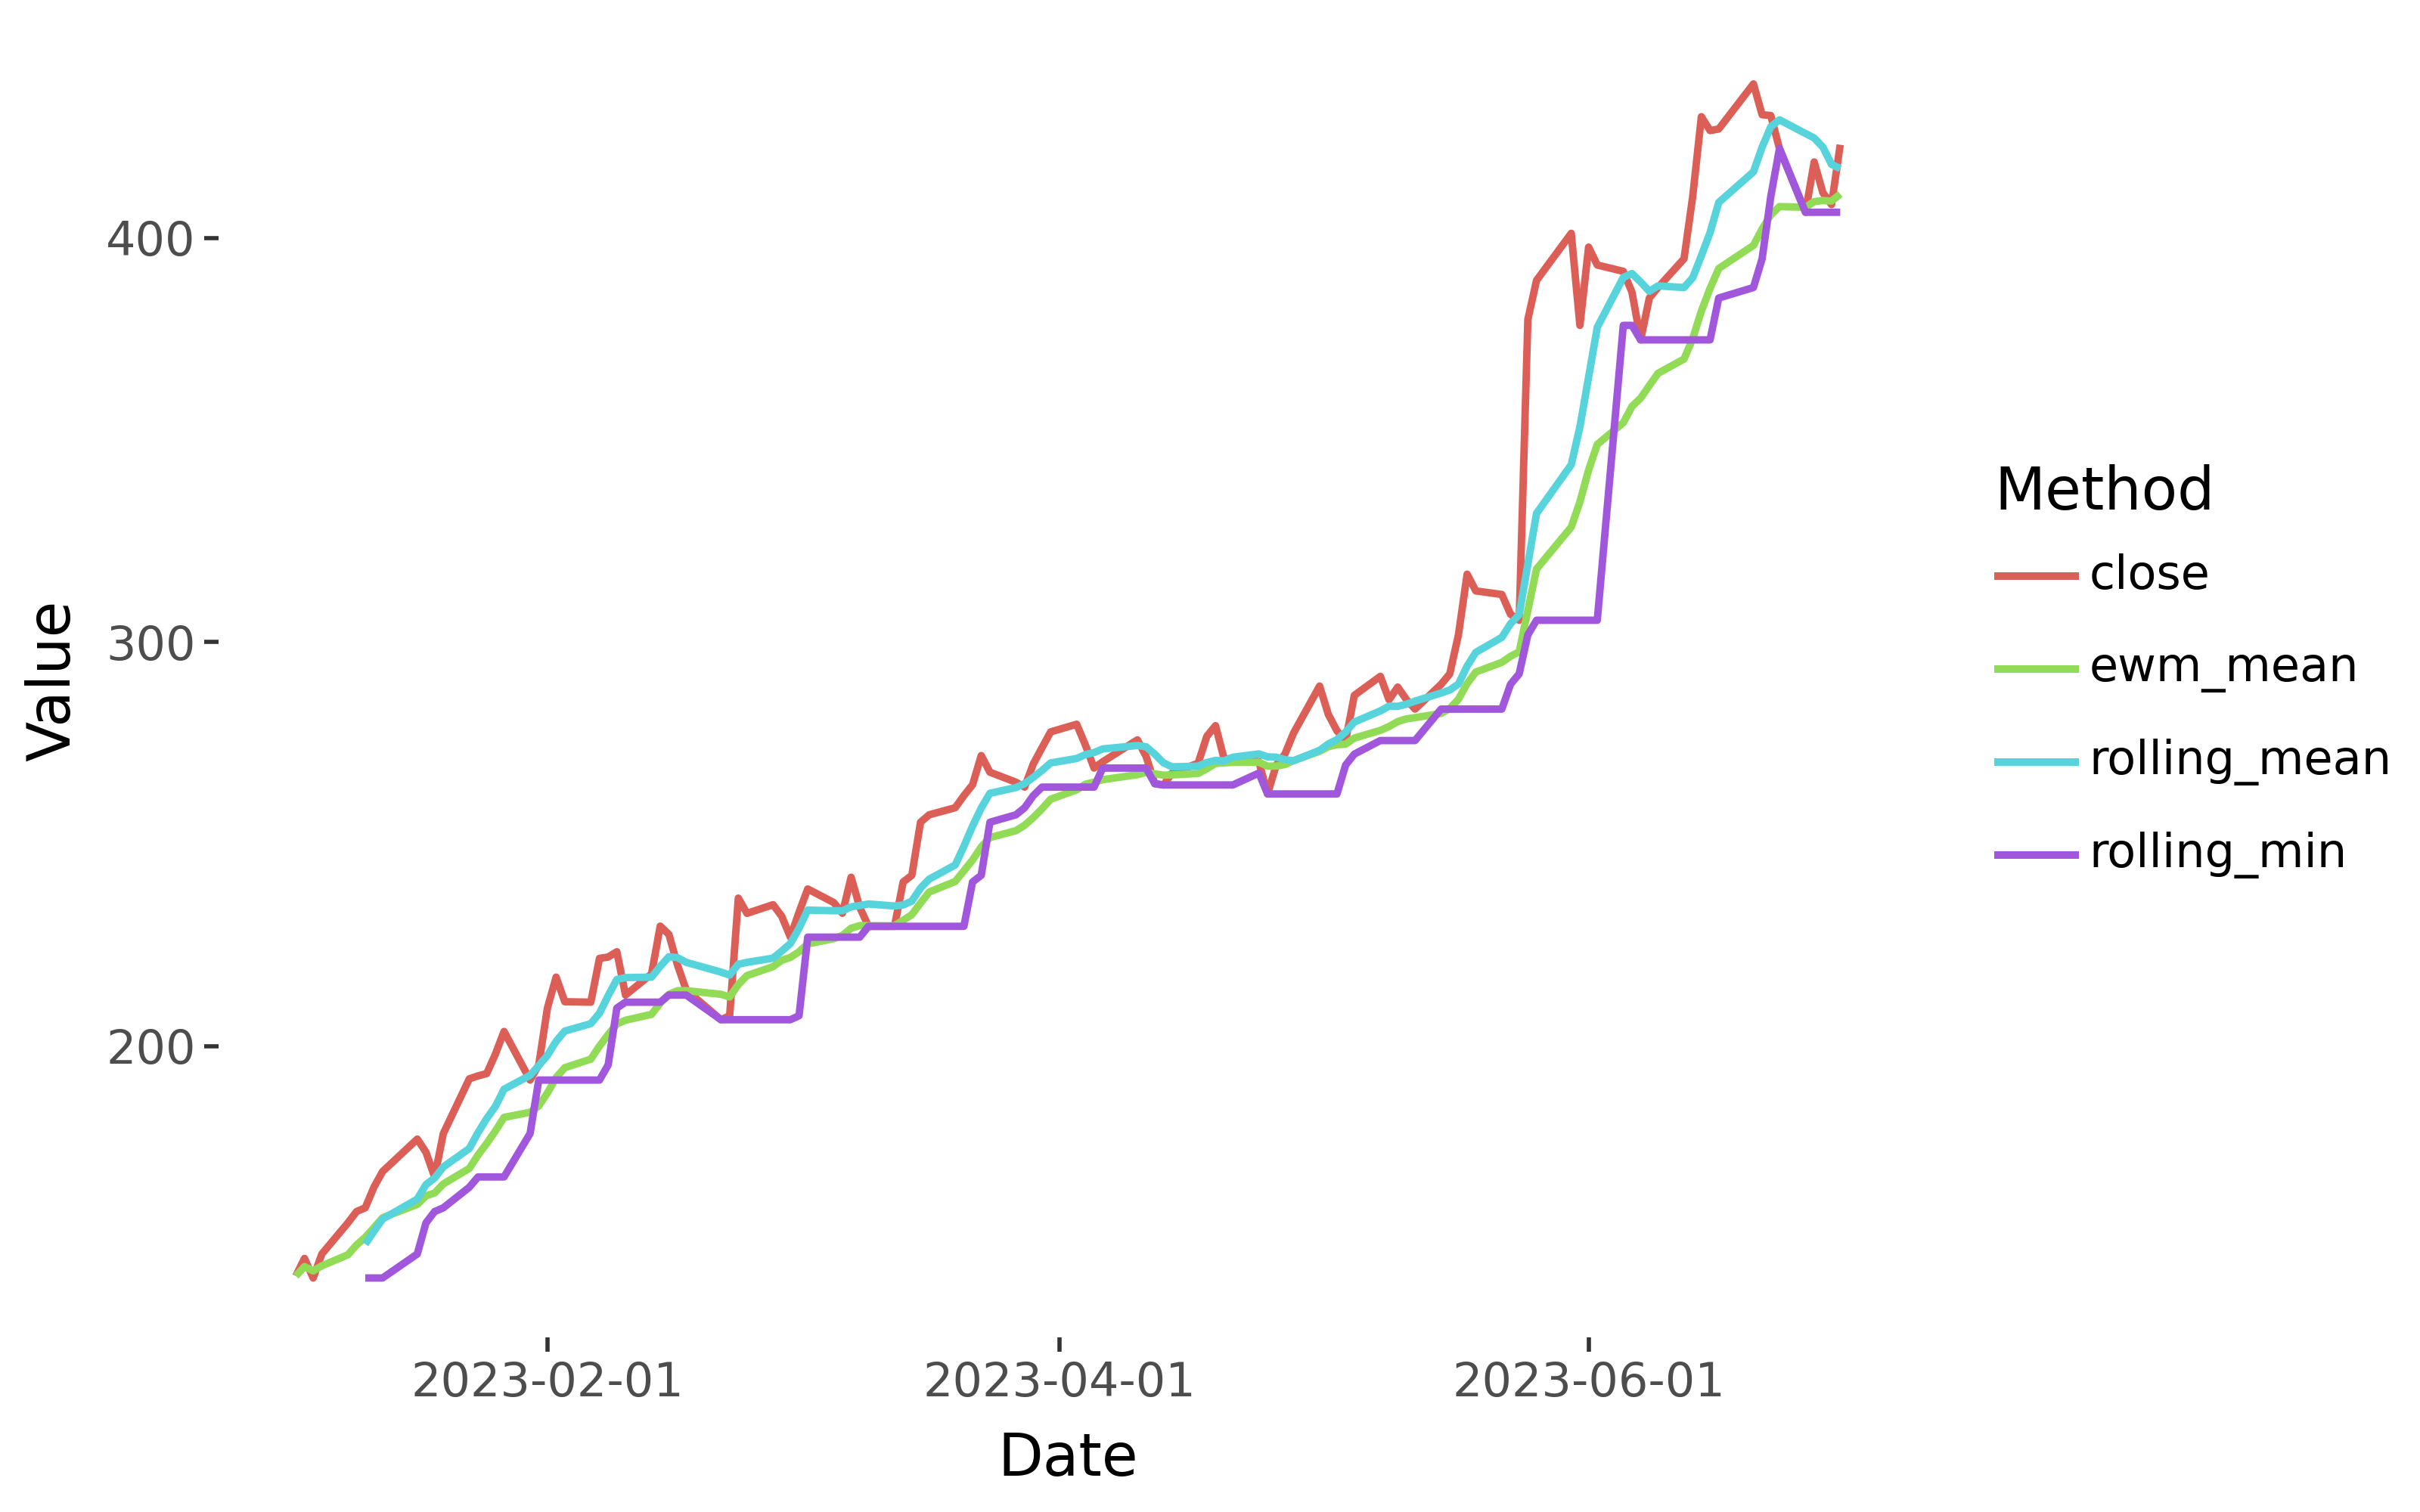

In [17]:
from plotnine import *

(
    ggplot(stock.unpivot(index="date"), aes("date", "value", color="variable"))
    + geom_line(size=1)
    + labs(x="Date", y="Value", color="Method")
    + theme_tufte(base_size=14)
    + theme(figure_size=(8, 5), dpi=200)
)

### Operations That Sort

In [18]:
(
    pl.DataFrame(
        {
            "x": [1, 3, None, 3, 7],
            "y": ["D", "I", "S", "C", "O"],
        }
    ).with_columns(
        arg_sort=pl.col("x").arg_sort(),
        shuffle=pl.col("x").shuffle(seed=7),
        sort=pl.col("x").sort(nulls_last=True),
        sort_by=pl.col("x").sort_by("y"),
        reverse=pl.col("x").reverse(),
        rank=pl.col("x").rank(),
    )
)

shape: (5, 8)
┌──────┬─────┬──────────┬─────────┬──────┬─────────┬─────────┬──────┐
│ x    ┆ y   ┆ arg_sort ┆ shuffle ┆ sort ┆ sort_by ┆ reverse ┆ rank │
│ ---  ┆ --- ┆ ---      ┆ ---     ┆ ---  ┆ ---     ┆ ---     ┆ ---  │
│ i64  ┆ str ┆ u32      ┆ i64     ┆ i64  ┆ i64     ┆ i64     ┆ f64  │
╞══════╪═════╪══════════╪═════════╪══════╪═════════╪═════════╪══════╡
│ 1    ┆ D   ┆ 2        ┆ 1       ┆ 1    ┆ 3       ┆ 7       ┆ 1.0  │
│ 3    ┆ I   ┆ 0        ┆ null    ┆ 3    ┆ 1       ┆ 3       ┆ 2.5  │
│ null ┆ S   ┆ 1        ┆ 3       ┆ 3    ┆ 3       ┆ null    ┆ null │
│ 3    ┆ C   ┆ 3        ┆ 7       ┆ 7    ┆ 7       ┆ 3       ┆ 2.5  │
│ 7    ┆ O   ┆ 4        ┆ 3       ┆ null ┆ null    ┆ 1       ┆ 4.0  │
└──────┴─────┴──────────┴─────────┴──────┴─────────┴─────────┴──────┘

### Other Operations

In [19]:
(
    pl.DataFrame({"x": [33, 33, 27, 33, 60, 60, 60, 33, 60]}).with_columns(
        rle_id=pl.col("x").rle_id(),
    )
)

shape: (9, 2)
┌─────┬────────┐
│ x   ┆ rle_id │
│ --- ┆ ---    │
│ i64 ┆ u32    │
╞═════╪════════╡
│ 33  ┆ 0      │
│ 33  ┆ 0      │
│ 27  ┆ 1      │
│ 33  ┆ 2      │
│ 60  ┆ 3      │
│ 60  ┆ 3      │
│ 60  ┆ 3      │
│ 33  ┆ 4      │
│ 60  ┆ 5      │
└─────┴────────┘

## Series-Wise Operations That Summarize to One

In [20]:
(
    pl.DataFrame({"x": [1, 3, 3, 7]}).with_columns(
        mean=pl.col("x").mean(),
    )
)

shape: (4, 2)
┌─────┬──────┐
│ x   ┆ mean │
│ --- ┆ ---  │
│ i64 ┆ f64  │
╞═════╪══════╡
│ 1   ┆ 3.5  │
│ 3   ┆ 3.5  │
│ 3   ┆ 3.5  │
│ 7   ┆ 3.5  │
└─────┴──────┘

In [22]:
(
    pl.DataFrame({"cluster": ["a", "a", "b", "b"], "x": [1, 3, 3, 7]})
    .group_by("cluster")
    .agg(
        mean=pl.col("x").mean(),
    )
)

shape: (2, 2)
┌─────────┬──────┐
│ cluster ┆ mean │
│ ---     ┆ ---  │
│ str     ┆ f64  │
╞═════════╪══════╡
│ a       ┆ 2.0  │
│ b       ┆ 5.0  │
└─────────┴──────┘

### Operations That Are Quantifiers

In [21]:
df = pl.DataFrame(
    {
        "x": [True, False, False],
        "y": [True, True, True],
        "z": [False, False, False],
    }
)
print(df)
print(
    df.select(
        pl.all().all().name.suffix("_all"),
        pl.all().any().name.suffix("_any"),
    ),
)

shape: (3, 3)
┌───────┬──────┬───────┐
│ x     ┆ y    ┆ z     │
│ ---   ┆ ---  ┆ ---   │
│ bool  ┆ bool ┆ bool  │
╞═══════╪══════╪═══════╡
│ true  ┆ true ┆ false │
│ false ┆ true ┆ false │
│ false ┆ true ┆ false │
└───────┴──────┴───────┘
shape: (1, 6)
┌───────┬───────┬───────┬───────┬───────┬───────┐
│ x_all ┆ y_all ┆ z_all ┆ x_any ┆ y_any ┆ z_any │
│ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---   ┆ ---   │
│ bool  ┆ bool  ┆ bool  ┆ bool  ┆ bool  ┆ bool  │
╞═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ false ┆ true  ┆ false ┆ true  ┆ true  ┆ false │
└───────┴───────┴───────┴───────┴───────┴───────┘


### Operations That Compute Statistics

In [23]:
samples = rng.normal(loc=5, scale=3, size=1_000_000)

(
    pl.DataFrame({"x": samples}).select(
        max=pl.col("x").max(),
        mean=pl.col("x").mean(),
        quantile=pl.col("x").quantile(quantile=0.95),
        skew=pl.col("x").skew(),
        std=pl.col("x").std(),
        sum=pl.col("x").sum(),
        var=pl.col("x").var(),
    )
)

shape: (1, 7)
┌───────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────┐
│ max       ┆ mean     ┆ quantile ┆ skew     ┆ std      ┆ sum      ┆ var      │
│ ---       ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ f64       ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞═══════════╪══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ 20.752443 ┆ 4.994978 ┆ 9.931565 ┆ 0.003245 ┆ 2.999926 ┆ 4.9950e6 ┆ 8.999558 │
└───────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┘

### Operations That Count

In [24]:
samples = pl.Series(rng.integers(low=0, high=10_000, size=1_729))
samples[403] = None
df_ints = pl.DataFrame({"x": samples}).with_row_index()
df_ints.slice(400, 6)

shape: (6, 2)
┌───────┬──────┐
│ index ┆ x    │
│ ---   ┆ ---  │
│ u32   ┆ i64  │
╞═══════╪══════╡
│ 400   ┆ 807  │
│ 401   ┆ 8634 │
│ 402   ┆ 2109 │
│ 403   ┆ null │
│ 404   ┆ 1740 │
│ 405   ┆ 3333 │
└───────┴──────┘

In [25]:
df_ints.select(
    approx_n_unique=pl.col("x").approx_n_unique(),
    count=pl.col("x").count(),
    len=pl.col("x").len(),
    n_unique=pl.col("x").n_unique(),
    null_count=pl.col("x").null_count(),
)

shape: (1, 5)
┌─────────────────┬───────┬──────┬──────────┬────────────┐
│ approx_n_unique ┆ count ┆ len  ┆ n_unique ┆ null_count │
│ ---             ┆ ---   ┆ ---  ┆ ---      ┆ ---        │
│ u32             ┆ u32   ┆ u32  ┆ u32      ┆ u32        │
╞═════════════════╪═══════╪══════╪══════════╪════════════╡
│ 1572            ┆ 1728  ┆ 1729 ┆ 1575     ┆ 1          │
└─────────────────┴───────┴──────┴──────────┴────────────┘

In [27]:
large_df_ints = pl.DataFrame(
    {"x": rng.integers(low=0, high=10_000, size=10_000_000)}
)

In [28]:
%%time
large_df_ints.select(pl.col("x").n_unique())

CPU times: user 531 ms, sys: 92.4 ms, total: 623 ms
Wall time: 180 ms


shape: (1, 1)
┌───────┐
│ x     │
│ ---   │
│ u32   │
╞═══════╡
│ 10000 │
└───────┘

In [29]:
%%time
large_df_ints.select(pl.col("x").approx_n_unique())

CPU times: user 41.1 ms, sys: 1.63 ms, total: 42.7 ms
Wall time: 41.5 ms


shape: (1, 1)
┌───────┐
│ x     │
│ ---   │
│ u32   │
╞═══════╡
│ 10013 │
└───────┘

### Other Operations

In [30]:
df_ints.select(
    arg_min=pl.col("x").arg_min(),
    first=pl.col("x").first(),
    get=pl.col("x").get(403),
    implode=pl.col("x").implode(),
    last=pl.col("x").last(),
    upper_bound=pl.col("x").upper_bound(),
)

shape: (1, 6)
┌─────────┬───────┬──────┬───────────────────┬──────┬─────────────────────┐
│ arg_min ┆ first ┆ get  ┆ implode           ┆ last ┆ upper_bound         │
│ ---     ┆ ---   ┆ ---  ┆ ---               ┆ ---  ┆ ---                 │
│ u32     ┆ i64   ┆ i64  ┆ list[i64]         ┆ i64  ┆ i64                 │
╞═════════╪═══════╪══════╪═══════════════════╪══════╪═════════════════════╡
│ 0       ┆ 0     ┆ null ┆ [0, 7245, … 3723] ┆ 3723 ┆ 9223372036854775807 │
└─────────┴───────┴──────┴───────────────────┴──────┴─────────────────────┘

## Series-Wise Operations That Summarize to One or More

### Operations Related to Unique Values

In [31]:
(
    pl.DataFrame({"x": ["A", "C", "D", "C"]}).select(
        arg_unique=pl.col("x").arg_unique(),
        unique=pl.col("x").unique(maintain_order=True),
        unique_counts=pl.col("x").unique_counts(),
        value_counts=pl.col("x").value_counts(sort=True),
    )
)

shape: (3, 4)
┌────────────┬────────┬───────────────┬──────────────┐
│ arg_unique ┆ unique ┆ unique_counts ┆ value_counts │
│ ---        ┆ ---    ┆ ---           ┆ ---          │
│ u32        ┆ str    ┆ u32           ┆ struct[2]    │
╞════════════╪════════╪═══════════════╪══════════════╡
│ 0          ┆ A      ┆ 1             ┆ {"C",2}      │
│ 1          ┆ C      ┆ 2             ┆ {"A",1}      │
│ 2          ┆ D      ┆ 1             ┆ {"D",1}      │
└────────────┴────────┴───────────────┴──────────────┘

### Operations That Select

In [32]:
df_ints.select(
    bottom_k=pl.col("x").bottom_k(7),
    head=pl.col("x").head(7),
    sample=pl.col("x").sample(7),
    slice=pl.col("x").slice(400, 7),
    gather=pl.col("x").gather([1, 1, 2, 3, 5, 8, 13]),
    gather_every=pl.col("x").gather_every(247),
    top_k=pl.col("x").top_k(7),
)

shape: (7, 7)
┌──────────┬──────┬────────┬───────┬────────┬──────────────┬───────┐
│ bottom_k ┆ head ┆ sample ┆ slice ┆ gather ┆ gather_every ┆ top_k │
│ ---      ┆ ---  ┆ ---    ┆ ---   ┆ ---    ┆ ---          ┆ ---   │
│ i64      ┆ i64  ┆ i64    ┆ i64   ┆ i64    ┆ i64          ┆ i64   │
╞══════════╪══════╪════════╪═══════╪════════╪══════════════╪═══════╡
│ 0        ┆ 0    ┆ 3324   ┆ 807   ┆ 7245   ┆ 0            ┆ 9998  │
│ 1        ┆ 7245 ┆ 4591   ┆ 8634  ┆ 7245   ┆ 8680         ┆ 9988  │
│ 6        ┆ 5227 ┆ 5640   ┆ 2109  ┆ 5227   ┆ 8483         ┆ 9988  │
│ 7        ┆ 2747 ┆ 9443   ┆ null  ┆ 2747   ┆ 8358         ┆ 9986  │
│ 10       ┆ 9816 ┆ 5403   ┆ 1740  ┆ 2657   ┆ 1805         ┆ 9985  │
│ 21       ┆ 2657 ┆ 3702   ┆ 3333  ┆ 5393   ┆ 3638         ┆ 9979  │
│ 29       ┆ 4578 ┆ 3867   ┆ 788   ┆ 8203   ┆ 5843         ┆ 9975  │
└──────────┴──────┴────────┴───────┴────────┴──────────────┴───────┘

### Operations That Drop Missing Values

In [33]:
x = [None, 1.0, 2.0, 3.0, np.nan]
(
    pl.DataFrame({"x": x}).select(
        drop_nans=pl.col("x").drop_nans(), drop_nulls=pl.col("x").drop_nulls()
    )
)

shape: (4, 2)
┌───────────┬────────────┐
│ drop_nans ┆ drop_nulls │
│ ---       ┆ ---        │
│ f64       ┆ f64        │
╞═══════════╪════════════╡
│ null      ┆ 1.0        │
│ 1.0       ┆ 2.0        │
│ 2.0       ┆ 3.0        │
│ 3.0       ┆ NaN        │
└───────────┴────────────┘

### Other Operations

In [34]:
numbers = [33, 33, 27, 33, 60, 60, 60, 33, 60]

(
    pl.DataFrame({"x": numbers}).select(
        arg_true=(pl.col("x") >= 60).arg_true(),
    )
)

shape: (4, 1)
┌──────────┐
│ arg_true │
│ ---      │
│ u32      │
╞══════════╡
│ 4        │
│ 5        │
│ 6        │
│ 8        │
└──────────┘

In [35]:
(
    pl.DataFrame({"x": numbers}).select(
        mode=pl.col("x").mode().sort(),
    )
)

shape: (2, 1)
┌──────┐
│ mode │
│ ---  │
│ i64  │
╞══════╡
│ 33   │
│ 60   │
└──────┘

In [36]:
(
    pl.DataFrame({"x": numbers}).select(
        reshape=pl.col("x").reshape((3, 3)),
    )
)

shape: (3, 1)
┌───────────────┐
│ reshape       │
│ ---           │
│ array[i64, 3] │
╞═══════════════╡
│ [33, 33, 27]  │
│ [33, 60, 60]  │
│ [60, 33, 60]  │
└───────────────┘

In [37]:
(
    pl.DataFrame({"x": numbers}).select(
        rle=pl.col("x").rle(),
    )
)

shape: (6, 1)
┌───────────┐
│ rle       │
│ ---       │
│ struct[2] │
╞═══════════╡
│ {2,33}    │
│ {1,27}    │
│ {1,33}    │
│ {3,60}    │
│ {1,33}    │
│ {1,60}    │
└───────────┘

In [38]:
(
    pl.DataFrame({"x": numbers}).select(
        rle=pl.col("x").sort().search_sorted(42),
    )
)

shape: (1, 1)
┌─────┐
│ rle │
│ --- │
│ u32 │
╞═════╡
│ 5   │
└─────┘

## Series-Wise Operations That Extend

In [39]:
(
    pl.DataFrame(
        {
            "x": [["a", "b"], ["c", "d"]],
        }
    ).select(explode=pl.col("x").explode())
)

shape: (4, 1)
┌─────────┐
│ explode │
│ ---     │
│ str     │
╞═════════╡
│ a       │
│ b       │
│ c       │
│ d       │
└─────────┘